In [4]:
import numpy as np
import matplotlib.pyplot as plt

# define dN/dt = rN(1 - N/k)
def logistic(N, r=1.0, k=1.0):
    return r * N * (1.0 - N / k)

def euler(func, N, dt):
    return N + func(N) * dt

def modified_euler(func, N, dt):
    k1 = func(N)
    k3 = func(N + k1 * dt)
    return N + (k1 + k3) * dt / 2

def runge_kutta(func, N, dt):
    k1 = func(N)
    k2 = func(N + k1 * dt / 2)
    k3 = func(N + k2 * dt / 2)
    k4 = func(N + k3 * dt)
    return N + (k1 + 2 * k2 + 2 * k3 + k4) * dt / 6

def solve_ode(func, method, N0, tmax, nt):
    t = np.linspace(0, tmax, nt)
    dt = t[1] - t[0]
    N = [N0]
    for _ in range(nt - 1):
        N.append(method(func, N[-1], dt))
    return t, np.array(N)

def main():
    method = runge_kutta
    t, y = solve_ode(logistic, method, N0=1e-3, tmax=20, nt=100)
    fig, ax = plt.subplots()
    ax.plot(t, y, ".")
    ax.set_xlabel("t")
    ax.set_ylabel("N")

    plt.show()

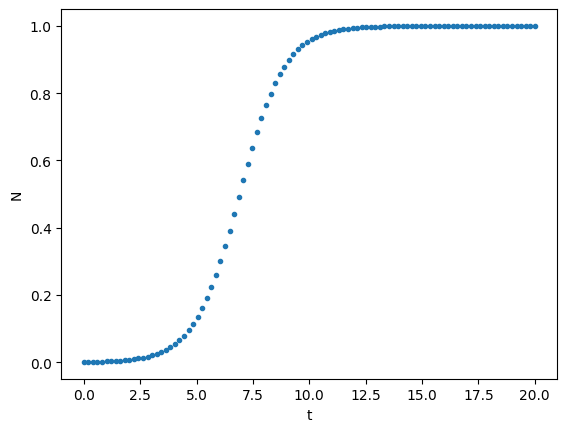

In [5]:
if __name__ == "__main__":
    main()